# Marketing Analytics Project

## Imports

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
import seaborn as sns
import plotly.express as px
import scipy.stats as scp
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd

# Import data
data = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/marketing_data.csv')

print("Size of data:", data.shape)

data.head(5)

Ukuran data: (2240, 22)


,Tanggal Lahir,Pergawean,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran
0,7/23/1970,Karyawan,Cerai,"Rp84.835.000,-",0,0,-2674,0,189558,104877,379560,111215,189861,218702,1,4,4,6,1,Tidak pernah,Jawa,5
1,8/18/1961,Karyawan,Lajang,"Rp57.091.000,-",0,0,-2675,0,464558,5877,64560,7215,861,37702,1,7,3,7,5,Tidak pernah,Sumatera,"[1, 5]"
2,4/9/1958,Karyawan,Menikah,"Rp67.267.000,-",0,1,-2708,0,134558,11877,59560,15215,2861,30702,1,3,2,5,2,Tidak pernah,NTT,NaN
3,12/18/1967,Karyawan,Berumahtangga,"Rp32.474.000,-",1,1,-2710,0,10558,877,1560,215,861,702,1,1,0,2,7,Tidak pernah,Kalimantan,NaN
4,4/30/1989,Karyawan,Lajang,"Rp21.474.000,-",1,0,-2743,0,6558,16877,24560,11215,861,34702,2,3,1,2,7,Tidak pernah,Jawa,"[2, 5]"


## Exploratory Data Analysis

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Tanggal Lahir            2240 non-null   object
 1   Pergawean                2240 non-null   object
 2   Status Kawin             2240 non-null   object
 3   Penghasilan per Tahun    2216 non-null   object
 4   Tanggungan Ortu          2240 non-null   int64 
 5   Tanggungan Anak          2240 non-null   int64 
 6   Mulai Berlangganan       2240 non-null   int64 
 7   Transaksi Terakhir       2240 non-null   int64 
 8   Sembako                  2240 non-null   int64 
 9   Elektronik               2240 non-null   int64 
 10  Hobi                     2240 non-null   int64 
 11  Pakaian                  2240 non-null   int64 
 12  Buku                     2240 non-null   int64 
 13  Kesehatan                2240 non-null   int64 
 14  Jml Transaksi Diskon     2240 non-null  

### Attributes Description

| Attribute Name | Attribute Type | Description |
| ----------- | ----------- | ----------- |
| `Date of Birth`| Categorical | Customer's date of birth |
| `Matrimony`| Categorical | Customer's current job title |
| `Marital status`| Categorical | Customer's current marital status |
| `Income per Year`| Categorical | Annual customer income (in IDR) |
| `Parent's Dependent`| Numerical | Number of parents who are still dependent on the customer |
| `Child Dependency`| Numerical | Number of children supported by the customer |
| `Start Subscription`| Numerical | H-that's all customers have started subscribing (calculated from 8 September 2021) |
| `Last Transaction`| Numerical | Number of days after the customer made the last transaction |
| `Donation`| Categorical | The amount of money used to give donation in the last 1 year |
| `Electronics`| Numerical | The amount of money used to buy electronics in the last 1 year |
| `Hobby`| Numerical | Amount of money used to buy hobby items in the last 1 year |
| `Clothes`| Numerical | The amount of money used to buy clothes in the last 1 year |
| `Book`| Categorical | The amount of money used to buy books in the last 1 year |
| `Health`| Numerical | The amount of money used to buy health goods in the last 1 year |
| `Discount Transaction Amount`| Numerical | Number of transactions with discounts that customers have made |
| `App Transaction Amount`| Numerical | Number of transactions through the app that customers have carried out |
| `Web Transaction Amount`| Numerical | Number of transactions via the web that customers have carried out |
| `Outlet Transaction Amount`| Numerical | Number of transactions through outlets that customers have carried out |
| `Number of App Visits`| Numerical | Number of customer visits to the app |
| `Complaint`| Categorical | 1 if the customer has ever complained, 0 if not |
| `Island`| Categorical | Customer's domicile island |
| `Order of Accepting Offers`| Categorical | Of the 6 offers, which offer has been accepted by the customer? If a customer receives more than 1 offer, it will be saved in the list. |

Text(0.5, 1.0, 'Correlation matrix')

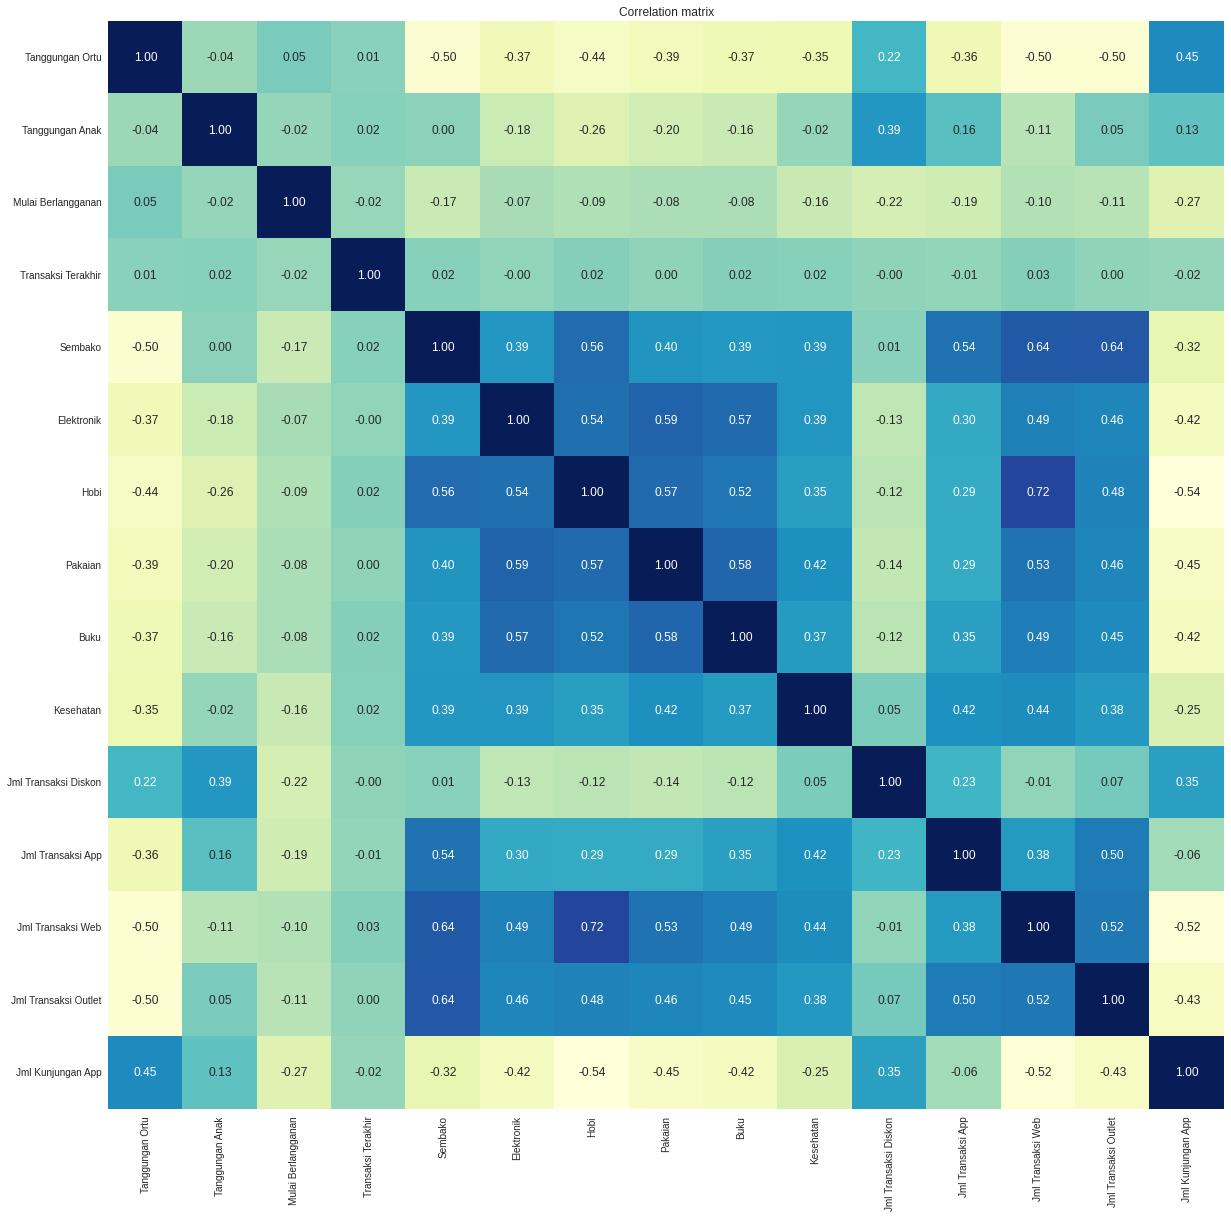

In [ ]:
plt.figure(figsize=(20,20))

sns.heatmap(data.select_dtypes(np.number).corr(), 
        annot=True,
        cbar = False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=data.select_dtypes(np.number).columns,
        yticklabels=data.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

The correlation matrix shows that 'the attributes 'Hobbies' and 'Web Transaction Amount' has the highest correlation amongst others with the value of 0.72 (closest to 1), followed by 'Donation' to 'Web Transaction Amount' and 'Outlet Transaction Amount.

## Prepocessing

Duplicates

In [ ]:
def cek_dup(df):
    col_dup = df.duplicated().sum()
    percent = col_dup / len(df)
    print('Amount of duplicates is {} that includes {}% from the data'.format(col_dup, percent*100))

cek_dup(data)

Jumlah duplikasi data sebesar 0 yang mencakup 0.0% dari data


Missing Values

In [ ]:
data.isna().sum()

Tanggal Lahir                 0
Pergawean                     0
Status Kawin                  0
Penghasilan per Tahun        24
Tanggungan Ortu               0
Tanggungan Anak               0
Mulai Berlangganan            0
Transaksi Terakhir            0
Sembako                       0
Elektronik                    0
Hobi                          0
Pakaian                       0
Buku                          0
Kesehatan                     0
Jml Transaksi Diskon          0
Jml Transaksi App             0
Jml Transaksi Web             0
Jml Transaksi Outlet          0
Jml Kunjungan App             0
Komplain                      0
Pulau                         0
Urutan Terima Penawaran    1631
dtype: int64

In [ ]:
# Handling missing values

data_cleaned = data.copy()
data_cleaned['Penghasilan per Tahun'] = data_cleaned['Penghasilan per Tahun'].fillna(data_cleaned['Penghasilan per Tahun'].mode()[0])

In [ ]:

data_cleaned.isna().sum()

Tanggal Lahir                 0
Pergawean                     0
Status Kawin                  0
Penghasilan per Tahun         0
Tanggungan Ortu               0
Tanggungan Anak               0
Mulai Berlangganan            0
Transaksi Terakhir            0
Sembako                       0
Elektronik                    0
Hobi                          0
Pakaian                       0
Buku                          0
Kesehatan                     0
Jml Transaksi Diskon          0
Jml Transaksi App             0
Jml Transaksi Web             0
Jml Transaksi Outlet          0
Jml Kunjungan App             0
Komplain                      0
Pulau                         0
Urutan Terima Penawaran    1631
dtype: int64

Outlier

In [ ]:
# Showing Outlier

new_data = data.copy()

Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1

upperbound = Q3 + 1.5 * IQR
lowerbound = Q1 - 1.5 * IQR

is_outlier = new_data[(new_data > upperbound) | (new_data < lowerbound)]

print("Banyaknya outlier untuk tiap tiap atribut: ")
print(is_outlier.count())

Banyaknya outlier untuk tiap tiap atribut: 
Tanggal Lahir                0
Pergawean                    0
Status Kawin                 0
Penghasilan per Tahun        0
Tanggungan Ortu              0
Tanggungan Anak              0
Mulai Berlangganan           0
Transaksi Terakhir           0
Sembako                     35
Elektronik                 227
Hobi                       175
Pakaian                    223
Buku                       248
Kesehatan                  207
Jml Transaksi Diskon        86
Jml Transaksi App            4
Jml Transaksi Web           23
Jml Transaksi Outlet         0
Jml Kunjungan App            8
Komplain                     0
Pulau                        0
Urutan Terima Penawaran      0
dtype: int64


In [ ]:
# Handling Outlier

Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1

upperbound = Q3 + 1.5 * IQR
lowerbound = Q1 - 1.5 * IQR

temp = new_data[((new_data <= upperbound) & (new_data >= lowerbound)).all(axis=1)]
is_outlier1 = temp[(new_data > upperbound) | (new_data < lowerbound)]

new_data = temp
new_data

,Tanggal Lahir,Pergawean,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran


## Problem Solving

### Clustering based on relevant features with Clustering and RFM Model

RFM analysis is applied to the dataset at the aggregate level and used to segment customers into homogeneous groups. The variables in RFM are R-recency, F-frequency, and M-monetary, which are defined and computed. In our dataset, we have the Last Transaction attribute for R-recency, the attribute Number of Discount Transactions, the Number of App Transactions, the Number of Web Transactions, the Number of Outlet Transactions, the Number of App Visits for F-frequency, and the attributes Groceries, Electronics, Hobbies, Clothes, Books , Health for M-monetary

In [ ]:
rfm = pd.DataFrame()

# Recency
rfm['Recency'] = data_cleaned['Transaksi Terakhir']

# Frequency
rfm['Frequency'] = data_cleaned['Jml Transaksi Diskon'] + data_cleaned['Jml Transaksi App'] + data_cleaned['Jml Transaksi Web'] + data_cleaned['Jml Transaksi Outlet'] + data_cleaned['Jml Kunjungan App']

# Monetary 
rfm['Monetary'] = data_cleaned['Sembako'] + data_cleaned['Elektronik'] + data_cleaned['Hobi'] + data_cleaned['Pakaian'] + data_cleaned['Buku'] + data_cleaned['Kesehatan']

rfm

,Recency,Frequency,Monetary
0,0,16,1193773
1,0,23,580773
2,0,13,254773
3,0,11,14773
4,0,15,94773
...,...,...,...
2235,99,24,692773
2236,99,13,58773
2237,99,22,312773
2238,99,23,1386773


In [ ]:
display(rfm.describe())

,Recency,Frequency,Monetary
count,2240.000000,2240.000000,2.240000e+03
mean,49.109375,20.178571,6.095712e+05
std,28.962453,7.293275,6.022493e+05
min,0.000000,0.000000,8.773000e+03
25%,24.000000,14.000000,7.252300e+04
50%,49.000000,19.000000,3.997730e+05
75%,74.000000,25.000000,1.049273e+06
max,99.000000,46.000000,2.528773e+06


In [ ]:

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary'] + other_selected_features])

In [ ]:
s1 = np.full((1, rfm.shape[0]-int(0.8*rfm.shape[0])),1)
s2 = np.full((1, int(0.2*rfm.shape[0])),2)
s3 = np.full((1, int(0.2*rfm.shape[0])),3)
s4 = np.full((1, int(0.2*rfm.shape[0])),4)
s5 = np.full((1, int(0.2*rfm.shape[0])),5)
score = np.hstack((s1,s2,s3,s4,s5)).flatten() 

rfm = rfm.sort_values(by="Recency", ascending=False)
rfm['r_score'] = score

for i,j in zip(('Frequency', 'Monetary'), ('f_score', 'm_score')):
    rfm = rfm.sort_values(by=i)
    rfm[j] = score

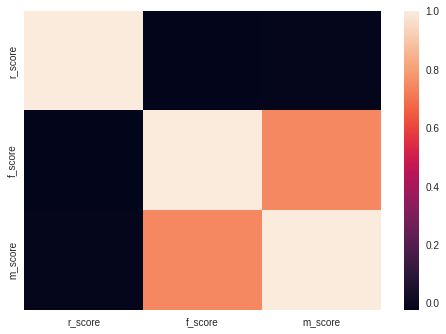

In [ ]:
sns.heatmap(rfm.iloc[:, 3:6].corr())

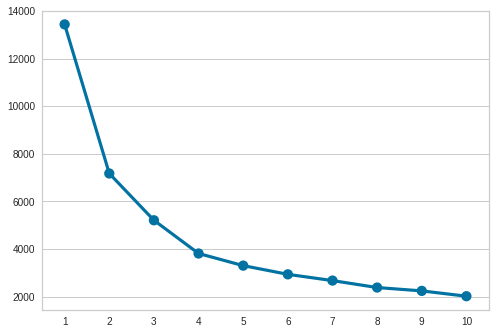

In [ ]:
# Segmenting with K-Means
from sklearn.cluster import AgglomerativeClustering, KMeans


SSE = []
for i in range(0, 10):
    kmeans = KMeans(n_clusters = 1 + i, random_state = 1231).fit(rfm.iloc[:, 3:])
    SSE.append(kmeans.inertia_)

sns.pointplot(x = list(range(1, 11)), y = SSE)
plt.show()

In [ ]:
!pip install yellowbrick==1.3

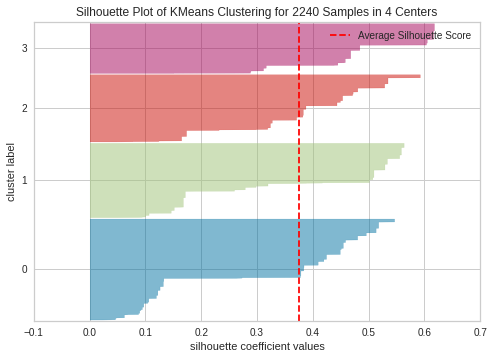

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(rfm.iloc[:, 3:])
visualizer.show()

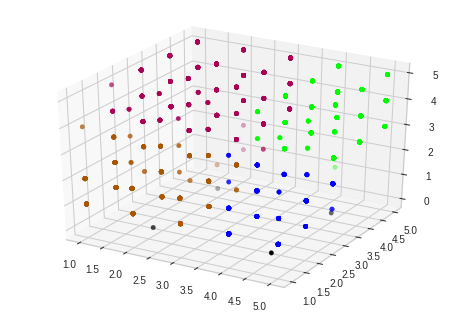

In [ ]:
model = KMeans(n_clusters=4, random_state=1231).fit(rfm.iloc[:, 3:])
centers = model.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm.iloc[:, 3], rfm.iloc[:, 4], rfm.iloc[:, 5], cmap="brg", c=model.predict(rfm.iloc[:, 3:]))
ax.scatter(centers[:, 0], centers[:, 1], c='black');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



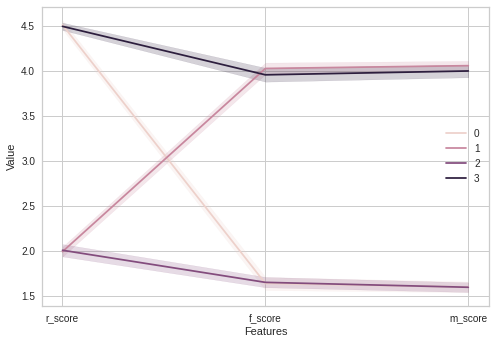

In [ ]:
# Identify Clustering

rfm['Cluster'] = model.labels_
rfm['Cust ID'] = rfm.index

melted = pd.melt(rfm.reset_index(),
                id_vars = ['Cust ID', 'Cluster'],
                value_vars = ['r_score', 'f_score', 'm_score'],
                var_name = 'Features',
                value_name = 'Value')
sns.lineplot('Features', 'Value', hue = 'Cluster', data = melted)
plt.legend()


In [ ]:
rfm.groupby('Cluster').agg({
    'Recency':['mean', 'min', 'max'],
    'Frequency':['mean', 'min', 'max'],
    'Monetary':['mean', 'min', 'max', 'count']})

Recency          Frequency  ...      Monetary                      
              mean min max       mean  ...          mean    min      max count
Cluster                                ...                                    
0        19.005249   0  39  13.454068  ...  8.511421e+04   9773   821773   381
1        69.410853  39  99  25.033592  ...  1.009801e+06  11773  2527773   774
2        68.961404  39  99  13.575439  ...  8.764318e+04   8773   828773   570
3        18.897087   0  39  25.165049  ...  9.737245e+05  12773  2528773   515

[4 rows x 10 columns]

| Clusters | Customer Type | RFM Characteristics |
| ---------------- | ------------ | ------------ |
| `Cluster 0` | Departed customers | Customers who have not made a transaction for a long time and have a low transaction frequency. Including customers with light consumption |
| `Cluster 1`| Best Customer | Customers who have recently made transactions and have a high transaction frequency. Including customers with heavy consumption |
| `Cluster 2`| New customers | Customers who have recently made transactions, but have a low transaction frequency. Including customers with light consumption |
| `Cluster 3`| Customers at risk of leaving | Customers who have not made a transaction for a long time, but have a high transaction frequency. Including customers with heavy consumption |

### What is the tendency for customers to accept an offer more than once and approximately how many offers will it take for the customer to accept the offer?

In [ ]:
# View data on order to receive offers
data_cleaned['Order to Accept Offers'].head(10)

0         5
1    [1, 5]
2       NaN
3       NaN
4    [2, 5]
5         5
6    [2, 5]
7       NaN
8       NaN
9       NaN
Name: Urutan Terima Penawaran, dtype: object

In [ ]:
# Handle missing values in the Receive Offer Sequence attribute
offer_data = pd.DataFrame(data_cleaned['Offer Accept Sequence'])
offer_data.dropna(inplace=True)
display(offer_data)

,Urutan Terima Penawaran
0,5
1,"[1, 5]"
4,"[2, 5]"
5,5
6,"[2, 5]"
...,...
2212,"[4, 5]"
2216,"[3, 5]"
2217,3
2227,0


In [ ]:
import ast
myarray = []

idx = 0
for i in offer_data['Sequence of Accepting Offers']:
     if '[' in i:
         teststr = i
         arr = ast.literal_eval(teststr)
         myarray.append(len(arr))
     else:
         num = len(i)
         # offer_data['frequency'][idx] = num
         myarray.append(num)

df_offers = pd.DataFrame(myarray, columns=['frequency'])
df_offers

,frekuensi
0,1
1,2
2,2
3,1
4,2
...,...
604,2
605,2
606,1
607,1


In [ ]:
# Calculation of group by frequency
df_offers_count = df_offers.groupby('frequency').size()
df_offer_count = pd.DataFrame({'amount':df_offer_count.index, 'frequency':df_offer_count.values})
df_offer_count

,jumlah,frekuensi
0,1,370
1,2,142
2,3,51
3,4,36
4,5,10


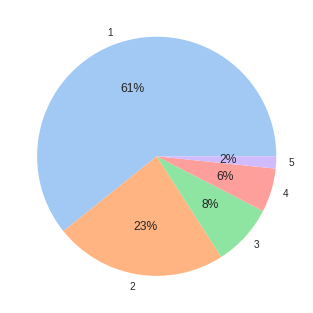

In [ ]:
# Visualization of offer frequency
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df_offer_count['frequency'], labels = df_offer_count['number'], colors = colors, autopct='%.0f%%')
plt.show()

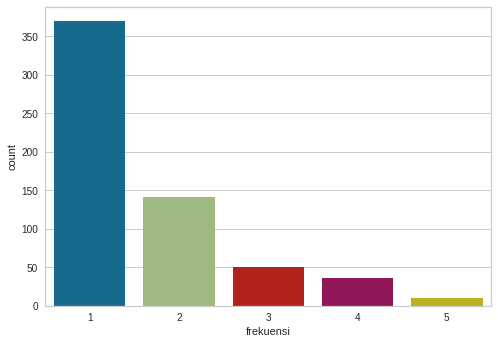

In [ ]:
# Visualization of offer frequency
sns.countplot(x='frequency', data=df_offer)

In [ ]:
# Takes the first index from the list or sequence of offers first received by the customer

import ast
arrayReceive = []

idx = 0
for i in offer_data['Sequence of Accepting Offers']:
     if '[' in i:
         teststr = i
         arr = ast.literal_eval(teststr)
         arrayAccept.append(arr[0])
     else:
         arrayAccept.append(int(i))

df_accept_offer = pd.DataFrame(arrayAccept, columns=['Accept Offer'])
df_accept_offer

,Terima Penawaran
0,5
1,1
2,2
3,5
4,2
...,...
604,4
605,3
606,3
607,0


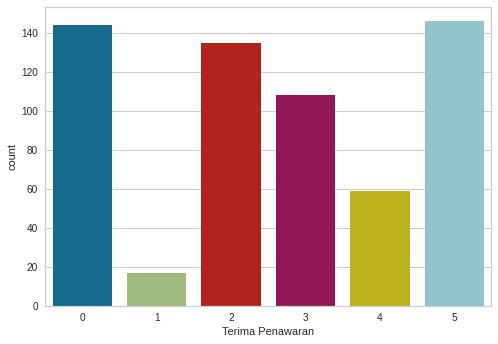

In [ ]:
# Visualization of the first order of acceptance of the offer by the customer
sns.countplot(x='Accept Offer', data=df_accept_offer)

In [ ]:
# Calculation of group by frequency
df_received_offer_count = df_received_offer.groupby('Accept Offer').size()
df_received_offer_count = pd.DataFrame({'Amount':df_received_offer_count.index, 'Accepted Offer':df_received_offer_count.values})
df_accept_offer_count

,Jumlah,Terima Penawaran
0,0,144
1,1,17
2,2,135
3,3,108
4,4,59
5,5,146


#### **Conclusion**
* In the results of the analysis we conducted, the tendency for customers to accept an offer more than once is less than to only accept an offer once. Customers who received 1 offer amounted to 61% of the data. Meanwhile, customers who choose an offer more than once, if accumulated, are only around 39%.
* Then, from the analysis that we have also carried out, we will approximately need one or six offers before the customer can accept the offer. It can be seen from the frequency of customers who accepted offers in the first offer, it was 144, and the highest number was in the 6th offer, namely 146.

### 3. What types of commodities are in demand by customers from each island and which island provides the greatest profit from each commodity?

In [ ]:
df_komoditi = pd.DataFrame({'Sembako':data_cleaned['Sembako'],
                            'Elektronik':data_cleaned['Elektronik'],
                            'Hobi':data_cleaned['Hobi'],
                            'Pakaian':data_cleaned['Pakaian'],
                            'Buku':data_cleaned['Buku'],
                            'Kesehatan':data_cleaned['Kesehatan'],
                            'Pulau':data_cleaned['Pulau']})
df_komoditi.head(10)

,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Pulau
0,189558,104877,379560,111215,189861,218702,Jawa
1,464558,5877,64560,7215,861,37702,Sumatera
2,134558,11877,59560,15215,2861,30702,NTT
3,10558,877,1560,215,861,702,Kalimantan
4,6558,16877,24560,11215,861,34702,Jawa
5,336558,130877,411560,240215,32861,43702,Jawa
6,769558,80877,252560,15215,34861,65702,NTB
7,78558,877,11560,215,861,7702,Jawa
8,384558,877,102560,21215,32861,5702,NTT
9,384558,877,102560,21215,32861,5702,Sulawesi


In [ ]:
# The most popular
df_komoditi_new = df_komoditi.groupby('Island').mean().round(2)
df_new_commodity

,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan
Pulau,,,,,,
Bali,314854.74,27396.29,173847.83,40778.80,27623.61,45595.18
Jawa,309225.58,26855.08,164068.68,36986.69,28453.69,42950.40
Kalimantan,277883.00,25152.00,144916.25,36677.50,29661.00,50502.00
NTB,312916.33,26393.67,174510.00,39940.00,24777.67,49510.33
NTT,297860.75,28803.61,186394.86,40921.42,27328.89,45234.11
Papua,576891.33,3543.67,272893.33,75548.33,41527.67,74035.33
Sulawesi,245612.05,26485.11,171749.19,32850.14,22651.54,41485.78
Sumatera,316412.48,29779.99,172754.03,37632.91,29510.25,46534.09


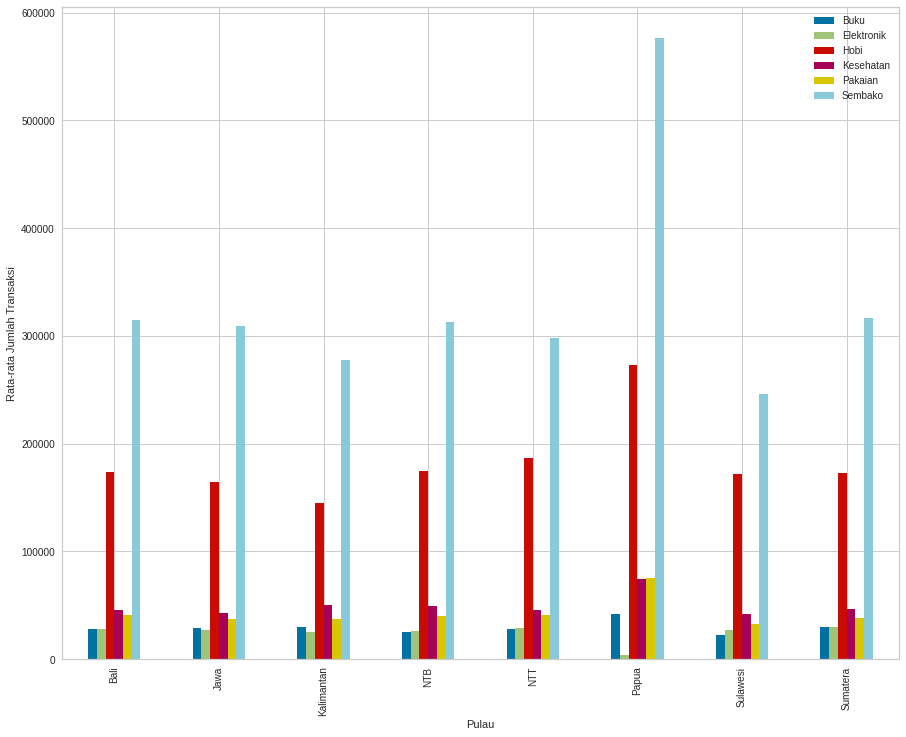

In [ ]:
# Visualization
df_pivot_profit = pd.pivot_table(
     df_new_commodity,
     index="Island",
     aggfunc=np.mean
)

ax = df_pivot_profit.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(15, 12)
ax.set_xlabel("Island")
ax.set_ylabel("Average Number of Transactions")

ax

#### **Analyze which islands provide the greatest profits on each commodity**

In [ ]:
# Biggest Profits
df_commodity_large = df_commodity.groupby('Island').sum()
display(df_large_commodity)

,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan
Pulau,,,,,,
Bali,106106046,9232549,58586720,13742455,9309157,15365574
Jawa,338602010,29406315,179655200,40500425,31156795,47030690
Kalimantan,44461280,4024320,23186600,5868400,4745760,8080320
NTB,37549960,3167240,20941200,4792800,2973320,5941240
NTT,32466822,3139593,20317040,4460435,2978849,4930518
Papua,1730674,10631,818680,226645,124583,222106
Sulawesi,36350584,3919796,25418880,4861820,3352428,6139896
Sumatera,84798544,7981036,46298080,10085620,7908748,12471136


#### **Conclusion**
From the results of the analysis that we have carried out, we found that the types of commodities that customers from each island are interested in are the same types of commodities, namely **donation**. From the analysis of average expenditure, the following data was obtained:

| Island | Most Popular Commodities | Average Amount of Expenditure |
| ----------- | ----------- | ----------- |
| Bali | Donation | 314854.74 |
| Java | Donation | 309225.58 |
| Kalimantan | Donation | 277883.00 |
| NTB | Donation | 312916.33 |
| NTT | Donation | 297860.75 |
| Papua | Donation | 576891.33 |
| Sulawesi | Donation | 245612.05 |
| Sumatra | Donation | 316412.48 |


Then, the island of Java is the island that provides the largest profits for each commodity, it can be seen from the results of the analysis of the number of profits per island which has shown that the total profits from all existing data are surpassed by the island of **Java**.

### 4. What is the relationship between the type of platform that customers often use compared to demographics (age, occupation, marital status, etc.)?

#### **Comparison with age**

In [ ]:
platform_umur = pd.DataFrame({'Jml Transaksi App':data_cleaned['Jml Transaksi App'],
                            'Jml Transaksi Web':data_cleaned['Jml Transaksi Web'],
                            'Jml Transaksi Outlet':data_cleaned['Jml Transaksi Outlet'],
                            'Tanggal Lahir':data_cleaned['Tanggal Lahir']})
platform_umur.head(10)

,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Tanggal Lahir
0,4,4,6,7/23/1970
1,7,3,7,8/18/1961
2,3,2,5,4/9/1958
3,1,0,2,12/18/1967
4,3,1,2,4/30/1989
5,4,7,5,10/2/1958
6,10,10,7,11/19/1954
7,2,1,3,10/1/1967
8,6,2,9,10/4/1954
9,6,2,9,4/8/1954


In [ ]:
# Handle age from date of birth

# platform_age["Date of Birth"] = pd.to_datetime(platform_age['Date of Birth'], format='%m/%d/%Y', errors='coerce')
# platform_age["Year of birth"] = platform_age['Date of Birth'].dt.year
# platform_age["Age"] = 2021 - (platform_age["Year of birth"])

arr = []
for i in data_cleaned['Birth Date']:
   tempList = i.split('/')
   arr.append(int(tempList[2]))

platform_age["Year of birth"] = arr
platform_age["Age"] = 2021 - platform_age["Year of birth"]

platform_age_temp = pd.DataFrame()
platform_age_temp['Age_Temp'] = 2021 - platform_age["Year of birth"]
platform_age.head(10)

,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Tanggal Lahir,Tahun lahir,Umur
0,4,4,6,7/23/1970,1970,51
1,7,3,7,8/18/1961,1961,60
2,3,2,5,4/9/1958,1958,63
3,1,0,2,12/18/1967,1967,54
4,3,1,2,4/30/1989,1989,32
5,4,7,5,10/2/1958,1958,63
6,10,10,7,11/19/1954,1954,67
7,2,1,3,10/1/1967,1967,54
8,6,2,9,10/4/1954,1954,67
9,6,2,9,4/8/1954,1954,67


In [ ]:
# Gen-Z (0) : <= 26
# Millennials = 27 - 40
# Gen-X = 41 - 56
# Baby Boomers = 57 - 75
# Elderly 75 >

age = platform_age["Age"]
age_group = []

for i in age:
   if i <= 26:
     age_group.append(0)
   elif 27 <= i < 41:
     age_group.append(1)
   elif 41 <= i < 57:
     age_group.append(2)
   elif 57 <= i < 76:
     age_group.append(3)
   else:
     age_group.append(4)
  
platform_age["Age Group"] = age_group
platform_age

,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Tanggal Lahir,Tahun lahir,Umur,Kelompok Usia
0,4,4,6,7/23/1970,1970,51,2
1,7,3,7,8/18/1961,1961,60,3
2,3,2,5,4/9/1958,1958,63,3
3,1,0,2,12/18/1967,1967,54,2
4,3,1,2,4/30/1989,1989,32,1
...,...,...,...,...,...,...,...
2235,5,2,11,5/29/1976,1976,45,2
2236,1,0,3,10/5/1977,1977,44,2
2237,6,1,5,5/30/1976,1976,45,2
2238,5,4,10,6/26/1978,1978,43,2


In [ ]:
platform_age = platform_age.drop(columns=["Year of birth", "Age", "Date of Birth"])
platform_age_groupby = platform_age.groupby('Age Group').sum()
platform_age_groupby

,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet
Kelompok Usia,,,
0,18,25,41
1,1309,903,1990
2,4283,2481,5918
3,3374,2433,4832
4,166,121,189


#### Analysis Summary

#### **By Age Group**
| Age Group | Age Range | Most Frequently Used Platforms | Least Used Platform
| ----------- | ----------- | ----------- | ----------- |
| `0 (Gen-Z) `| <= 26 | Outlets | Apps |
| `1 (Millennial)`| 27 - 40 | Outlets | Web |
| `2 (Gen-X)`| 41 - 56 | Outlets | Web |
| `3 (Baby Boomers)`| 57 - 75 | Outlets | Web |
| `4 (Elderly)`| 75 > | Outlets | Web |


#### **By Platform**
| Platforms | Age Groups Who Frequently Use | Age Groups Who Rarely Use
| ----------- | ----------- | ----------- |
| `App` | Gen-X | Gen-Z |
| `Web` | Gen-X | Gen-Z |
| `Outler` | Gen-X | Gen-Z |

#### **Comparison with annual income**

In [ ]:
import re
income_array = []

idx = 0
for i in data_cleaned['Income per Year']:
   num = int(''.join(filter(str.isdigit, i)))
   numint = int(num)
   income_array.append(numint)
   # idx += 1

df_income = pd.DataFrame(array_income, columns=['Income per Year'])

In [ ]:
year_income_platform = pd.DataFrame({'App Transaction Amount':data_cleaned['App Transaction Amount'],
                             'Web Transaction Amount':data_cleaned['Web Transaction Amount'],
                             'Outlet Transaction Amount':data_cleaned['Outlet Transaction Amount'],
                             'Income per Year':df_income['Income per Year']})

In [ ]:
income = platform_income_year["Income per Year"]
income_group = []

for i in income:
   if i < 34999999:
     income_group.append(0)
   elif 35000000 < i < 49999999:
     income_group.append(1)
   elif 50000000 < i < 69999999:
     income_group.append(2)
   else:
     income_group.append(4)
  
platform_income_year["Income Group"] = income_group
platform_income_year

,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Penghasilan per Tahun,Kelompok Penghasilan
0,4,4,6,84835000,4
1,7,3,7,57091000,2
2,3,2,5,67267000,2
3,1,0,2,32474000,0
4,3,1,2,21474000,0
...,...,...,...,...,...
2235,5,2,11,66476000,2
2236,1,0,3,31056000,0
2237,6,1,5,46310000,1
2238,5,4,10,65819000,2


In [ ]:
income_class = year_income_platform.copy()
new_income_class = income_class.drop(columns=["Income per Year"])
income_class_groupby = new income_class.groupby('Income Group').sum()
display(class_income_groupby)

,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet
Kelompok Penghasilan,,,
0,1195,303,1738
1,1681,572,2101
2,3605,2131,4913
4,2669,2957,4218


#### Analysis Summary

#### **By Income Group**
| Income Group | Income Range | Most Frequently Used Platforms | Least Used Platform
| ----------- | ----------- | ----------- | ----------- |
| `0 (Low Class)`| < 34,999,999 | Apps | Web |
| `1 (Middle Class)`| 35,000,000 - 49,999,999 | Outlets | Web |
| `2 (High Class)`| 50,000,000 - 69,999,999 | Outlets | Web |
| `3 (Spinning Edge)`| > 70,000,000 | Outlets | Apps |


#### **By Platform**
| Platforms | Income Groups Who Frequently Use | Income Groups That Rarely Use
| ----------- | ----------- | ----------- |
| `App` | Upper Class | Low Class |
| `Web` | Sharp Twist | Low Class |
| `Outlets` | Upper Class | Low Class |

#### **Visualization of Correlation of Numerical Attributes (Age and Income) with the Platform used for customer transactions 🍪**

In [ ]:
visualization_numeric = pd.merge(platform_income_year, platform_age)
visualization_numeric

,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Penghasilan per Tahun,Kelompok Penghasilan,Kelompok Usia
0,4,4,6,84835000,4,2
1,4,4,6,84835000,4,2
2,4,4,6,84835000,4,3
3,4,4,6,84835000,4,1
4,4,4,6,50353000,2,2
...,...,...,...,...,...,...
67263,10,3,7,70421000,4,3
67264,0,22,0,157243000,4,2
67265,8,7,12,66973000,2,1
67266,9,4,10,64590000,2,2


In [ ]:
visualization_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67268 entries, 0 to 67267
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Jml Transaksi App      67268 non-null  int64
 1   Jml Transaksi Web      67268 non-null  int64
 2   Jml Transaksi Outlet   67268 non-null  int64
 3   Penghasilan per Tahun  67268 non-null  int64
 4   Kelompok Penghasilan   67268 non-null  int64
 5   Kelompok Usia          67268 non-null  int64
dtypes: int64(6)
memory usage: 3.6 MB


Text(0.5, 1.0, 'Correlation matrix')

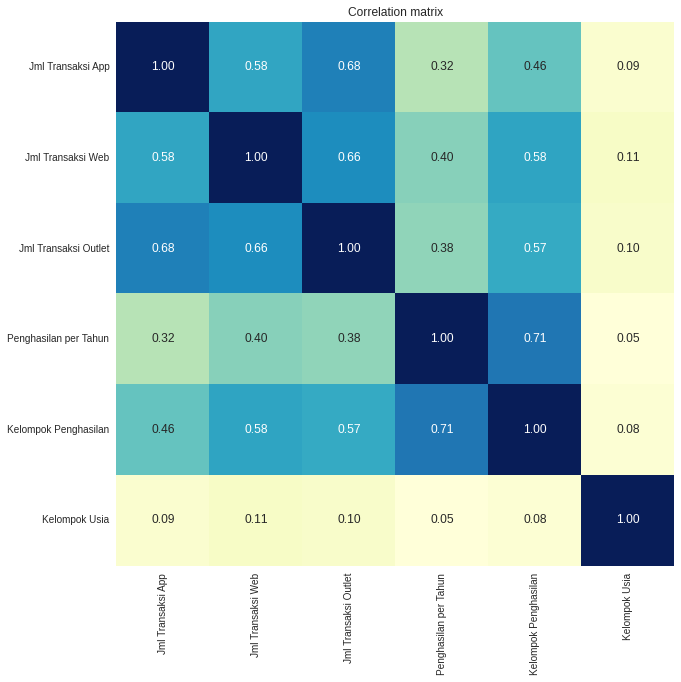

In [ ]:
# Correlation matrix visualization of each numerical feature
plt.figure(figsize=(10,10))

sns.heatmap(visualization_numeric.select_dtypes(np.number).corr(),
         annot=True,
         cbar = False,
         fmt="0.2f",
         cmap="YlGnBu",
         xticklabels=visualization_numeric.select_dtypes(np.number).columns,
         yticklabels=numerical_visualization.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

The correlation above shows the correlation between the age group and income group variables on the number of transactions per platform. From these correlation results, we conclude that age group has no correlation or relationship with the number of transactions carried out on each platform. Meanwhile, income groups appear to have a correlation with the number of transactions per platform.

#### **Comparison with marital status**

In [ ]:
platform_kawin = pd.DataFrame({'App Transaction Amount':data_cleaned['App Transaction Amount'],
                             'Web Transaction Amount':data_cleaned['Web Transaction Amount'],
                             'Outlet Transaction Amount':data_cleaned['Outlet Transaction Amount'],
                             'Married Status':data_cleaned['Married Status']})

mating_groupby = platform_marriage.groupby('Married Status').sum()
print(married_groupby)

               Jml Transaksi App  Jml Transaksi Web  Jml Transaksi Outlet
Status Kawin                                                             
Absurd                         7                 15                    13
Berumahtangga               2367               1552                  3327
Cerai                       1000                620                  1350
Duda                         356                256                   494
HTS                           14                  2                    12
Jomblo                        15                  2                    12
Lajang                      1859               1248                  2707
Menikah                     3532               2268                  5055


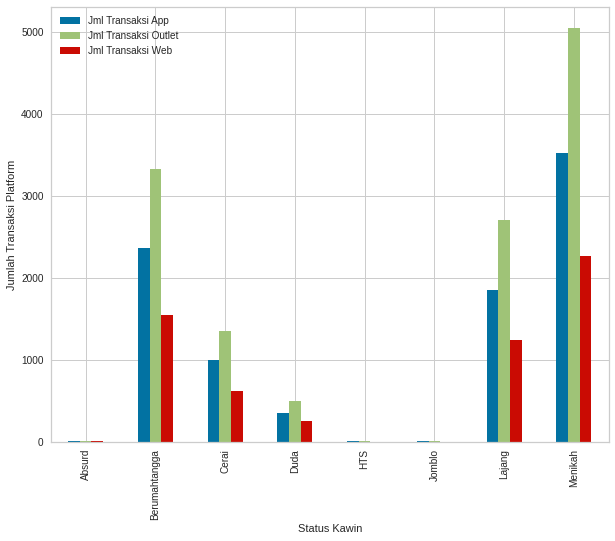

In [ ]:
df_pivot = pd.pivot_table(
     mating_groupby,
     index='Married Status',
     aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(10, 8)
ax.set_xlabel("Married Status")
ax.set_ylabel("Number of Platform Transactions")

ax

#### Analysis Summary

#### **Based on Marital Status**
| Marital Status | Most Frequently Used Platforms | Least Used Platform
| ----------- | ----------- | ----------- |
| `1 (Married)`| Outlets | Web |
| `2 (Divorce)`| Outlets | Web |
| `3 (Widower)`| Outlets | Web |
| `4 (HTS)`| Apps | Web |
| `5 (Singles)`| Apps | Web |
| `6 (Single)`| Outlets | Web |
| `7 (Divorce)`| Outlets | Web |
| `8 (Absurd)`| Web | Apps |

The graph above shows that of the existing marital statuses, 5 out of 8 statuses tend to have a higher transaction value on the outlet platform. However, the 3 marital statuses (Absurd, HTS, and Single) tend to have higher transaction values on the App and Website platforms.

#### **Comparison with jobs**

In [ ]:
job_platform = pd.DataFrame({'App Transaction Amount':data_cleaned['App Transaction Amount'],
                             'Web Transaction Amount':data_cleaned['Web Transaction Amount'],
                             'Outlet Transaction Amount':data_cleaned['Outlet Transaction Amount'],
                             'Employment':data_cleaned['Employment']})
job_platform.head(10)

,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Pekerjaan
0,4,4,6,Karyawan
1,7,3,7,Karyawan
2,3,2,5,Karyawan
3,1,0,2,Karyawan
4,3,1,2,Karyawan
5,4,7,5,Kepala Divisi
6,10,10,7,C-level
7,2,1,3,Karyawan
8,6,2,9,Kepala Divisi
9,6,2,9,Kepala Divisi


In [ ]:
job_groupby = job_platform.groupby('Jobs').sum()
print(job_groupby)

               Jml Transaksi App  Jml Transaksi Web  Jml Transaksi Outlet
Pekerjaan                                                                
C-level                      757                471                  1118
Karyawan                    4649               3072                  6570
Kepala Divisi               2150               1443                  2946
Manager                     1492                951                  2182
Wirausaha                    102                 26                   154


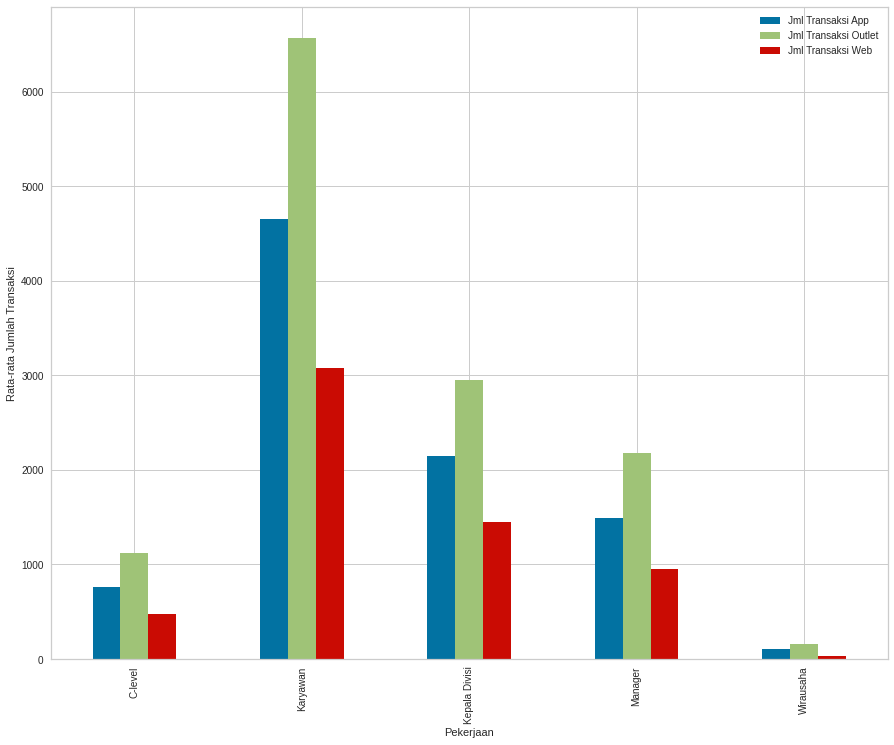

In [ ]:
# Visualization
df_pivot_job = pd.pivot_table(
     job_groupby,
     index="Job",
     aggfunc=np.sum
)

ax = df_pivot_job.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(15, 12)
ax.set_xlabel("Job")
ax.set_ylabel("Average Number of Transactions")

ax

#### Analysis Summary

#### **Based on Employment Status**
| Employment Status | Most Frequently Used Platforms | Least Used Platform
| ----------- | ----------- | ----------- |
| `1 (C Level)`| Outlets | Web |
| `2 (Employee)`| Outlets | Web |
| `3 (Division Head)`| Outlets | Web |
| `4 (Manager)`| Outlets | Web |
| `5 (Entrepreneurship)`| Outlets | Web |

From the graph above, it can be concluded that all job positions tend to carry out transactions through outlets.

#### **Comparison with islands**

In [ ]:
island_platform = pd.DataFrame({'App Transaction Amount':data_cleaned['App Transaction Amount'],
                             'Web Transaction Amount':data_cleaned['Web Transaction Amount'],
                             'Outlet Transaction Amount':data_cleaned['Outlet Transaction Amount'],
                             'Island':data_cleaned['Island']})
island_platform.head(10)

,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Pulau
0,4,4,6,Jawa
1,7,3,7,Sumatera
2,3,2,5,NTT
3,1,0,2,Kalimantan
4,3,1,2,Jawa
5,4,7,5,Jawa
6,10,10,7,NTB
7,2,1,3,Jawa
8,6,2,9,NTT
9,6,2,9,Sulawesi


In [ ]:
island_groupby = island_platform.groupby('Island').sum()
print(island_groupby)

            Jml Transaksi App  Jml Transaksi Web  Jml Transaksi Outlet
Pulau                                                                 
Bali                     1397                917                  1988
Jawa                     4382               2849                  6352
Kalimantan                654                419                   879
NTB                       477                332                   721
NTT                       484                331                   658
Papua                      18                 15                    19
Sulawesi                  584                365                   785
Sumatera                 1154                735                  1568


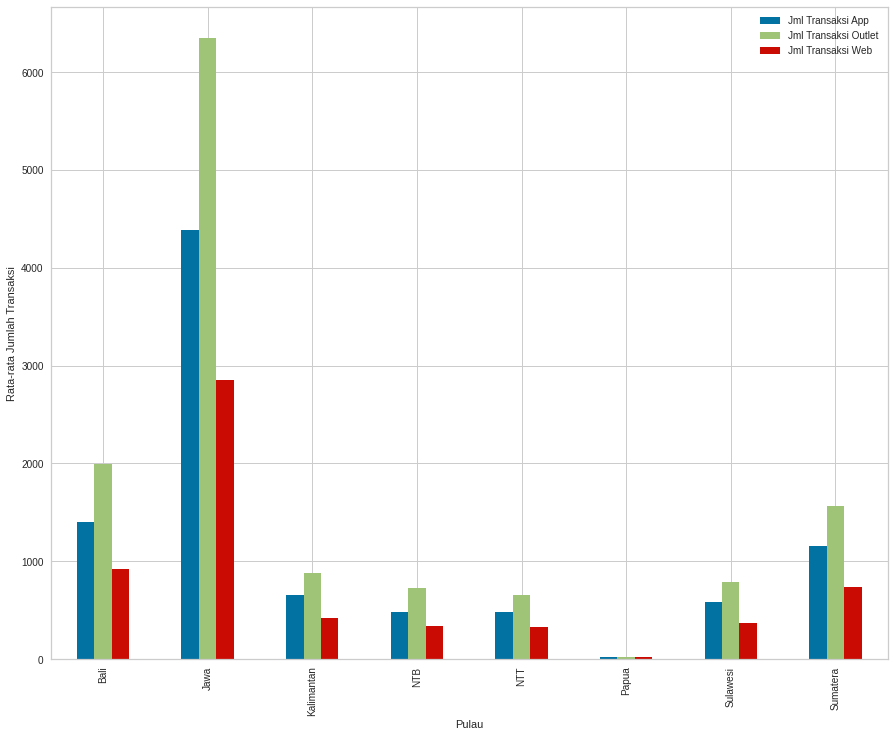

In [ ]:
# Visualization
df_pivot_island = pd.pivot_table(
     island_groupby,
     index="Island",
     aggfunc=np.sum
)

ax = df_pivot_island.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(15, 12)
ax.set_xlabel("Island")
ax.set_ylabel("Average Number of Transactions")

ax

#### Analysis Summary

#### **By Island**
| Island Status | Most Frequently Used Platforms | Least Used Platform
| ----------- | ----------- | ----------- |
| `1 (Balinese)`| Outlets | Web |
| `2 (Java)`| Outlets | Web |
| `3 (Kalimantan)`| Outlets | Web |
| `4 (NTB)`| Outlets | Web |
| `5 (NTT)`| Outlets | Web |
| `6 (Papua)`| ? | ? |
| `7 (Sulawesi)`| Outlets | Web |
| `8 (Sumatra)`| Outlets | Web |

### 5. What information can you get from customers who complain? Are complaints predictable?

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
data_cleaned['Complaint'] = label_encode.fit_transform(data['Complaint'])

data_cleaned['Age'] = platform_age_temp['Age_Temp']
data_cleaned.head(10)

,Tanggal Lahir,Pergawean,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran,Umur
0,7/23/1970,Karyawan,Cerai,"Rp84.835.000,-",0,0,-2674,0,189558,104877,379560,111215,189861,218702,1,4,4,6,1,1,Jawa,5,51
1,8/18/1961,Karyawan,Lajang,"Rp57.091.000,-",0,0,-2675,0,464558,5877,64560,7215,861,37702,1,7,3,7,5,1,Sumatera,"[1, 5]",60
2,4/9/1958,Karyawan,Menikah,"Rp67.267.000,-",0,1,-2708,0,134558,11877,59560,15215,2861,30702,1,3,2,5,2,1,NTT,NaN,63
3,12/18/1967,Karyawan,Berumahtangga,"Rp32.474.000,-",1,1,-2710,0,10558,877,1560,215,861,702,1,1,0,2,7,1,Kalimantan,NaN,54
4,4/30/1989,Karyawan,Lajang,"Rp21.474.000,-",1,0,-2743,0,6558,16877,24560,11215,861,34702,2,3,1,2,7,1,Jawa,"[2, 5]",32
5,10/2/1958,Kepala Divisi,Lajang,"Rp71.691.000,-",0,0,-2765,0,336558,130877,411560,240215,32861,43702,1,4,7,5,2,1,Jawa,5,63
6,11/19/1954,C-level,Menikah,"Rp63.564.000,-",0,0,-2812,0,769558,80877,252560,15215,34861,65702,1,10,10,7,6,1,NTB,"[2, 5]",67
7,10/1/1967,Karyawan,Berumahtangga,"Rp44.931.000,-",0,1,-2823,0,78558,877,11560,215,861,7702,1,2,1,3,5,1,Jawa,NaN,54
8,10/4/1954,Kepala Divisi,Menikah,"Rp65.324.000,-",0,1,-2830,0,384558,877,102560,21215,32861,5702,3,6,2,9,4,1,NTT,NaN,67
9,4/8/1954,Kepala Divisi,Menikah,"Rp65.324.000,-",0,1,-2830,0,384558,877,102560,21215,32861,5702,3,6,2,9,4,1,Sulawesi,NaN,67


**Complaint Attribute**
* 1 = Never complained
* 0 = Ever complained

Text(0.5, 1.0, 'Correlation matrix')

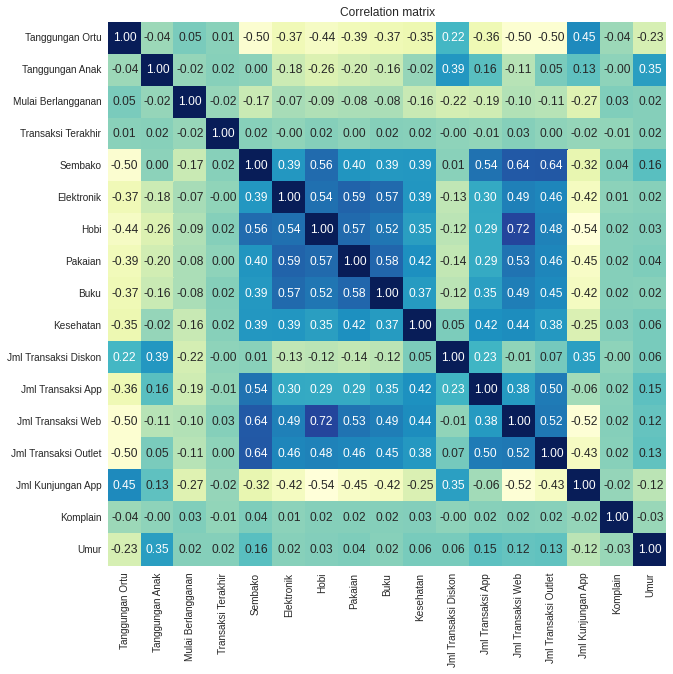

In [ ]:
# Correlation matrix visualization of each numerical feature
plt.figure(figsize=(10,10))

sns.heatmap(data_cleaned.select_dtypes(np.number).corr(),
         annot=True,
         cbar = False,
         fmt="0.2f",
         cmap="YlGnBu",
         xticklabels=data_cleaned.select_dtypes(np.number).columns,
         yticklabels=data_cleaned.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

In [ ]:
df_komplain = pd.DataFrame({'Outlet Transaction Amount':data_cleaned['Outlet Transaction Amount'],
                             'App Transaction Amount':data_cleaned['App Transaction Amount'],
                             'Web Transaction Amount':data_cleaned['Web Transaction Amount'],
                             # 'Clothes':data_cleaned['Clothes'],
                             # 'Books':data_cleaned['Books'],
                             # 'Health':data_cleaned['Health'],
                             'Complaint':data_cleaned['Complaint']})

df_complaint

,Jml Transaksi Outlet,Jml Transaksi App,Jml Transaksi Web,Komplain
0,6,4,4,1
1,7,7,3,1
2,5,3,2,1
3,2,1,0,1
4,2,3,1,1
...,...,...,...,...
2235,11,5,2,1
2236,3,1,0,1
2237,5,6,1,1
2238,10,5,4,1


In [ ]:
# Decision Tree

label = df_komplain['Complaint'].to_frame() # Label on data (To be predicted during classification)
del df_complaint['Complaint'] # Removes labels and leaves only features in the data

df_complaint

,Jml Transaksi Outlet,Jml Transaksi App,Jml Transaksi Web
0,6,4,4
1,7,7,3
2,5,3,2
3,2,1,0
4,2,3,1
...,...,...,...
2235,11,5,2
2236,3,1,0
2237,5,6,1
2238,10,5,4


In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training set and test set
# with the number of training sets being 80% of the total data
X_train, X_test, label_train, label_test = train_test_split(df_complaint, label, train_size=0.8, random_state=42)

* Min Max or linear scaling → changes the data distribution in the range 0 - 1
     * For neural networks/regression
     * Good for data with no/minimal outliers
     * Uniform data distribution

In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Transform data
scaled = scaler.fit_transform(df_complaint)

complaint_norm = pd.DataFrame(scaled)
complaint_norm

,0,1,2
0,0.461538,0.148148,0.142857
1,0.538462,0.259259,0.107143
2,0.384615,0.111111,0.071429
3,0.153846,0.037037,0.000000
4,0.153846,0.111111,0.035714
...,...,...,...
2235,0.846154,0.185185,0.071429
2236,0.230769,0.037037,0.000000
2237,0.384615,0.222222,0.035714
2238,0.769231,0.185185,0.142857


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Carry out training on a decision tree model with max_depth = 5
dt_complaint = DecisionTreeClassifier(max_depth=4)
dt_complain.fit(X_train, label_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# Predict testing data
predicted = dt_complaint.predict(X_test)

# Displays evaluation metrics in the form of accuracy, precision, recall and F1-Score values
print("Accuracy:", accuracy_score(label_test, predicted))
print("Precision:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

Akurasi: 0.9888392857142857
Presisi: 0.9888392857142857
Recall: 1.0
F1-score: 0.9943883277216611


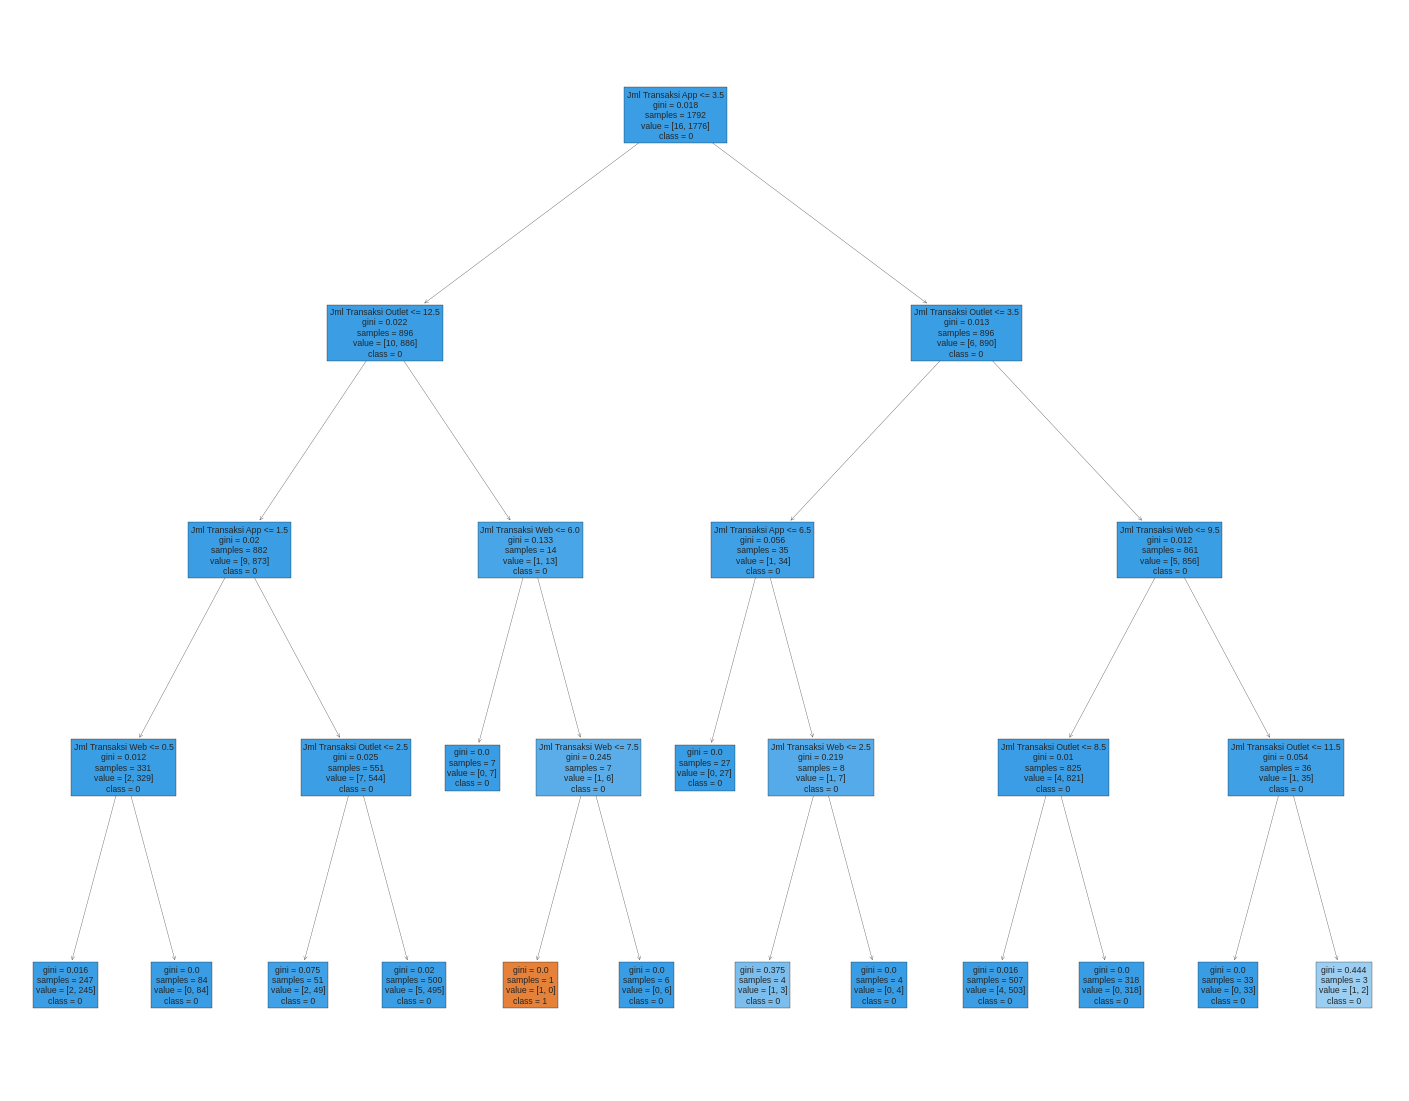

In [ ]:
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Visualize the decision tree that has been built previously
features = list(X_train.columns)
labels = [str(label) for label in list(label_train['Complaint'].unique())]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_complaint, feature_names=features, class_names=labels, filled=True)

In [ ]:
# Counting the number of complaints

count_no = 0;
ever_count = 0;
for i in data_cleaned['Complaint']:
   if i == 1:
     count_no += 1
   elif i == 0:
     ever_count += 1
  
print(count_no)
print(count_ever)

2219
21


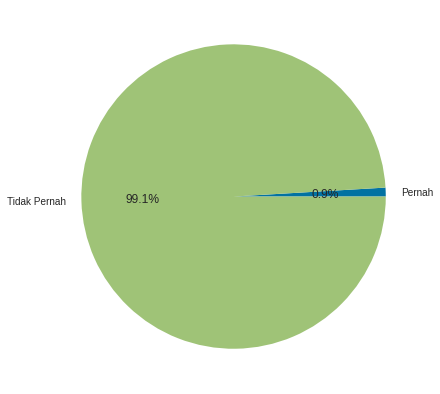

In [ ]:
# Import libraries

from matplotlib import pyplot as plt
import numpy as np

# Visualization of the "Complaint" Attribute

complaints = ['Never', 'Never']
number of_complaints = [21, 2219]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(number_of complaints, labels = complaints, autopct='%1.1f%%')
# show plot
plt.show()

The information we can extract from the Complaint attribute is the reason why it is difficult to predict the complaint attribute, where the value of the complaint attribute has a very large value comparison. It can be seen in the visualization above which is a comparison of Never Complained (1) and Never Complained (0), which has a VERY large comparison.

From these results, we conclude that complaints cannot be predicted. This is because there is no correlation between the Complaint attribute and other attributes. Apart from that, the data on the Complaint attribute is Imbalanced, because the percentage between 'Never' data of 99.1% and 'Never' of 0.9% is very different. In our opinion, complaints cannot be determined from the attributes in the dataset, but rather from the quality of the product or platform used by the customer himself.

### 6. How often are discounts given to customers? Is there a relationship between discount and offer acceptance?

In [ ]:
df_diskon = pd.DataFrame({'Number of Discount Transactions':data_cleaned['Number of Discount Transactions'],
                           'App Transaction Amount':data_cleaned['App Transaction Amount'],
                           'Web Transaction Amount':data_cleaned['Web Transaction Amount'],
                           'Outlet Transaction Amount':data_cleaned['Outlet Transaction Amount']
                           # 'Frequency of Offers per Customer':df_offers['frequency'],
                           # 'Most First Offers Accepted':df_accept_offers['Accept Offers']
                           })

df_diskon['Frequency'] = data_cleaned['App Transaction Amount'] + data_cleaned['Web Transaction Amount'] + data_cleaned['Outlet Transaction Amount']

df_diskon

,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Frequency
0,1,4,4,6,14
1,1,7,3,7,17
2,1,3,2,5,10
3,1,1,0,2,3
4,2,3,1,2,6
...,...,...,...,...,...
2235,2,5,2,11,18
2236,1,1,0,3,4
2237,2,6,1,5,12
2238,1,5,4,10,19


In [ ]:
# How often
often = df_diskon['Number of Discount Transactions'].sum() / df_diskon['Frequency'].sum()

print('often: ', often)

sering:  0.18545027240679415


Of all goods sold (transactions carried out) there were 18.5% of transactions using discounts. It can be said that approximately 1 in 5 transactions get a discount, which can be concluded that discounts are given quite often.

In [ ]:
df_discount_bidding = pd.DataFrame({'Number of Discount Transactions':data_cleaned['Number of Discount Transactions'],
                                     'Frequency of Offers Accepted by Customers':df_offers['frequency']
                           # 'Most First Offers Accepted':df_accept_offers['Accept Offers']
                           })

df_diskon_penawaran.fillna(value=0, inplace=True)
df_diskon_penawaran

,Jml Transaksi Diskon,Frekuensi Penawaran yang Diterima Customer
0,1,1.0
1,1,2.0
2,1,2.0
3,1,1.0
4,2,2.0
...,...,...
2235,2,0.0
2236,1,0.0
2237,2,0.0
2238,1,0.0


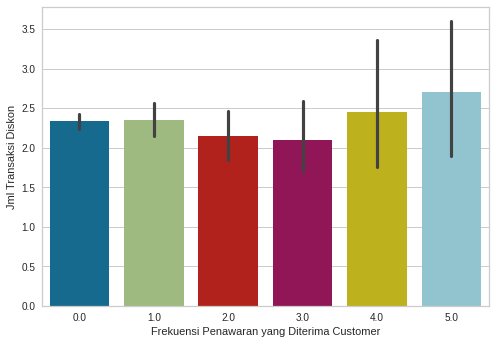

In [ ]:
sns.barplot(x = 'Frequency of Offers Received by Customers', y = 'Number of Discount Transactions', data = df_diskon_bidding)

Text(0.5, 1.0, 'Correlation matrix')

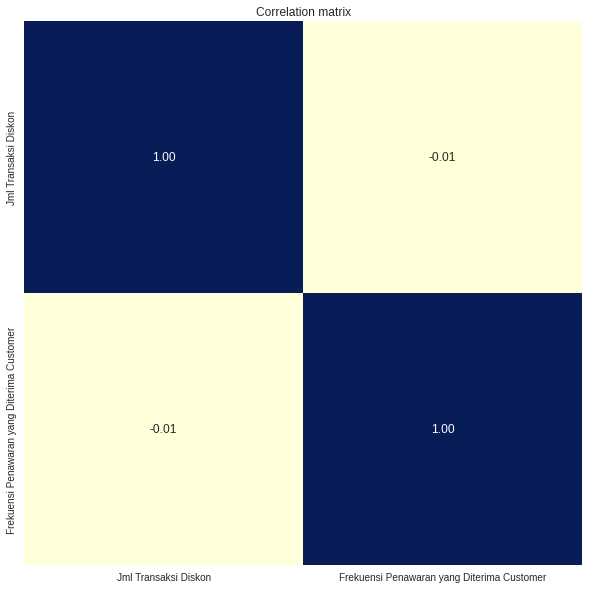

In [ ]:
# Correlation matrix visualization of each numerical feature
plt.figure(figsize=(10,10))

sns.heatmap(df_diskon_bidding.select_dtypes(np.number).corr(),
         annot=True,
         cbar = False,
         fmt="0.2f",
         cmap="YlGnBu",
         xticklabels=df_diskon_bidding.select_dtypes(np.number).columns,
         yticklabels=df_diskon_penawaran.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

It can be seen from the correlation results between the frequency of offers received by customers and the number of discount transactions that the correlation coefficient is close to 0, which indicates that there is almost no correlation. That way, because there is no correlation, it can be concluded that there is no relationship between discount transactions and the offers received by customers.

### 7. Create a model to predict the customer's tendency to accept the ith offer as the first offer received! Can the model be optimized (with other models or hyperparam tuning)?

In [ ]:
df_terima_penawaran

,Terima Penawaran
0,5
1,1
2,2
3,5
4,2
...,...
604,4
605,3
606,3
607,0


In [ ]:
data_cleaned

,Tanggal Lahir,Pergawean,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran,Umur
0,7/23/1970,Karyawan,Cerai,"Rp84.835.000,-",0,0,-2674,0,189558,104877,379560,111215,189861,218702,1,4,4,6,1,1,Jawa,5,51
1,8/18/1961,Karyawan,Lajang,"Rp57.091.000,-",0,0,-2675,0,464558,5877,64560,7215,861,37702,1,7,3,7,5,1,Sumatera,"[1, 5]",60
2,4/9/1958,Karyawan,Menikah,"Rp67.267.000,-",0,1,-2708,0,134558,11877,59560,15215,2861,30702,1,3,2,5,2,1,NTT,NaN,63
3,12/18/1967,Karyawan,Berumahtangga,"Rp32.474.000,-",1,1,-2710,0,10558,877,1560,215,861,702,1,1,0,2,7,1,Kalimantan,NaN,54
4,4/30/1989,Karyawan,Lajang,"Rp21.474.000,-",1,0,-2743,0,6558,16877,24560,11215,861,34702,2,3,1,2,7,1,Jawa,"[2, 5]",32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,5/29/1976,Kepala Divisi,Cerai,"Rp66.476.000,-",0,1,-3140,99,372558,18877,126560,47215,48861,78702,2,5,2,11,4,1,NTT,NaN,45
2236,10/5/1977,C-level,Menikah,"Rp31.056.000,-",1,0,-3184,99,5558,10877,13560,3215,8861,16702,1,1,0,3,8,1,Jawa,NaN,44
2237,5/30/1976,Karyawan,Cerai,"Rp46.310.000,-",1,0,-3234,99,185558,2877,88560,15215,5861,14702,2,6,1,5,8,1,Jawa,NaN,45
2238,6/26/1978,Karyawan,Menikah,"Rp65.819.000,-",0,0,-3238,99,267558,38877,701560,149215,165861,63702,1,5,4,10,3,1,Sulawesi,NaN,43


In [ ]:
data_cleaned.drop(['Date of Birth', 'Income per Year'], axis=1, inplace=True)

In [ ]:
data_cleaned['Income per Year'] = platform_income_year['Income per Year']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
data_cleaned['Island'] = label_encode.fit_transform(data['Island'])
data_cleaned['Mags'] = label_encode.fit_transform(data['Mags'])
data_cleaned['Married Status'] = label_encode.fit_transform(data['Married Status'])

In [ ]:
data_cleaned = data_cleaned.dropna()

In [ ]:
data_cleaned

,Pergawean,Status Kawin,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran,Umur,Penghasilan per Tahun
0,1,2,0,0,-2674,0,189558,104877,379560,111215,189861,218702,1,4,4,6,1,1,1,5,51,84835000
1,1,6,0,0,-2675,0,464558,5877,64560,7215,861,37702,1,7,3,7,5,1,7,"[1, 5]",60,57091000
4,1,6,1,0,-2743,0,6558,16877,24560,11215,861,34702,2,3,1,2,7,1,1,"[2, 5]",32,21474000
5,2,6,0,0,-2765,0,336558,130877,411560,240215,32861,43702,1,4,7,5,2,1,1,5,63,71691000
6,0,7,0,0,-2812,0,769558,80877,252560,15215,34861,65702,1,10,10,7,6,1,3,"[2, 5]",67,63564000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2,2,0,0,-3064,98,982558,17877,672560,23215,34861,51702,1,6,2,8,2,1,1,"[4, 5]",38,90687000
2216,2,2,0,1,-3294,98,459558,877,24560,6215,861,4702,6,4,5,7,6,1,4,"[3, 5]",61,50611000
2217,2,2,0,1,-3294,98,459558,877,24560,6215,861,4702,6,4,5,7,6,1,4,3,61,50611000
2227,1,1,0,1,-2744,99,362558,17877,398560,80215,35861,61702,3,5,3,5,4,1,1,0,59,62568000


In [ ]:
data_cleaned.drop('Order to Accept Offers', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_cleaned

,Pergawean,Status Kawin,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Umur,Penghasilan per Tahun
0,1,2,0,0,-2674,0,189558,104877,379560,111215,189861,218702,1,4,4,6,1,1,1,51,84835000
1,1,6,0,0,-2675,0,464558,5877,64560,7215,861,37702,1,7,3,7,5,1,7,60,57091000
4,1,6,1,0,-2743,0,6558,16877,24560,11215,861,34702,2,3,1,2,7,1,1,32,21474000
5,2,6,0,0,-2765,0,336558,130877,411560,240215,32861,43702,1,4,7,5,2,1,1,63,71691000
6,0,7,0,0,-2812,0,769558,80877,252560,15215,34861,65702,1,10,10,7,6,1,3,67,63564000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2,2,0,0,-3064,98,982558,17877,672560,23215,34861,51702,1,6,2,8,2,1,1,38,90687000
2216,2,2,0,1,-3294,98,459558,877,24560,6215,861,4702,6,4,5,7,6,1,4,61,50611000
2217,2,2,0,1,-3294,98,459558,877,24560,6215,861,4702,6,4,5,7,6,1,4,61,50611000
2227,1,1,0,1,-2744,99,362558,17877,398560,80215,35861,61702,3,5,3,5,4,1,1,59,62568000


In [ ]:
data_cleaned.drop('Start Subscription', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Implementation code here
X = data_cleaned
target = df_terima_penawaran['Accept Offer']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(k=10)
selector.fit(X, target)

SelectKBest()

In [ ]:
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

In [ ]:
features_df_new

,Tanggungan Ortu,Sembako,Elektronik,Hobi,Pakaian,Buku,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Penghasilan per Tahun
0,0,189558,104877,379560,111215,189861,4,6,1,84835000
1,0,464558,5877,64560,7215,861,3,7,5,57091000
4,1,6558,16877,24560,11215,861,1,2,7,21474000
5,0,336558,130877,411560,240215,32861,7,5,2,71691000
6,0,769558,80877,252560,15215,34861,10,7,6,63564000
...,...,...,...,...,...,...,...,...,...,...
2212,0,982558,17877,672560,23215,34861,2,8,2,90687000
2216,0,459558,877,24560,6215,861,5,7,6,50611000
2217,0,459558,877,24560,6215,861,5,7,6,50611000
2227,0,362558,17877,398560,80215,35861,3,5,4,62568000


In [ ]:
# MinMax normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Transform data
scaled = scaler.fit_transform(features_df_new)

basic food_norm = pd.DataFrame(scaled)
basic food_norm

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.126591,0.538860,0.235367,0.438735,0.954545,0.363636,0.461538,0.05,0.793274
1,0.0,0.310784,0.025907,0.039228,0.027668,0.000000,0.272727,0.538462,0.25,0.515342
2,0.5,0.004019,0.082902,0.014321,0.043478,0.000000,0.090909,0.153846,0.35,0.158541
3,0.0,0.225050,0.673575,0.255293,0.948617,0.161616,0.636364,0.384615,0.10,0.661601
4,0.0,0.515070,0.414508,0.156289,0.059289,0.171717,0.909091,0.538462,0.30,0.580187
...,...,...,...,...,...,...,...,...,...,...
604,0.0,0.657736,0.088083,0.417808,0.090909,0.171717,0.181818,0.615385,0.10,0.851898
605,0.0,0.307435,0.000000,0.014321,0.023715,0.000000,0.454545,0.538462,0.30,0.450427
606,0.0,0.307435,0.000000,0.014321,0.023715,0.000000,0.454545,0.538462,0.30,0.450427
607,0.0,0.242465,0.088083,0.247198,0.316206,0.176768,0.272727,0.384615,0.20,0.570209


In [ ]:
target = np.array(target)

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training set and test set
# with the number of training sets being 80% of the total data
data_train, data_test, label_train, label_test = train_test_split(features_df_new, target, test_size=0.2, random_state=42)

In [ ]:
# Model without hyperparam

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Conduct training on a random forest model
rf_md = RandomForestClassifier(max_depth=50, n_estimators=100)
rf_md.fit(data_train, label_train)

# Predict testing data
predicted = rf_md.predict(data_test)

# Displays evaluation metrics in the form of accuracy, precision, recall and F1-Score values
print("Accuracy:", accuracy_score(label_test, predicted))
print("Precision:", precision_score(label_test, predicted, average='macro'))
print("Recall:", recall_score(label_test, predicted, average='macro'))
print("F1-score:", f1_score(label_test, predicted, average='macro'))

Akurasi: 0.5245901639344263
Presisi: 0.5747474747474747
Recall: 0.4372214590964591
F1-score: 0.4414740431981811


In [ ]:
# Model with hyperparam
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Conduct training on a random forest model
rf_md = RandomForestClassifier(max_depth=50, n_estimators=100)
rf_md.fit(data_train, label_train)

# Predict testing data
predicted = rf_md.predict(data_test)

# Displays evaluation metrics in the form of accuracy, precision, recall and F1-Score values
print("Accuracy:", accuracy_score(label_test, predicted))
print("Precision:", precision_score(label_test, predicted, average='macro'))
print("Recall:", recall_score(label_test, predicted, average='macro'))
print("F1-score:", f1_score(label_test, predicted, average='macro'))

Akurasi: 0.5491803278688525
Presisi: 0.5837081475653466
Recall: 0.4615003052503053
F1-score: 0.45859251775011955


#### **Analysis**
To predict the customer's tendency to accept the i-th offer as the first offer received, we use the Random Forest Classifier model which we previously carried out feature selection to select appropriate features to use in modeling.
Next, we also explored the hyperparam tuning used in the model we created to produce the best accuracy, precision, recall and F1-score values. The tuning hyperparameters we use are max_depth and n_estimator

### 8. Create a model to predict the nominal value of customer basic food transactions! Based on the features used, is there any data leakage?

In [ ]:
df_sembako = pd.DataFrame({'Number of Basic Food Transactions':data_cleaned['Sembako'],
                            'App Transaction Amount':data_cleaned['App Transaction Amount'],
                            'Web Transaction Amount':data_cleaned['Web Transaction Amount'],
                            'Outlet Transaction Amount':data_cleaned['Outlet Transaction Amount']
                            })

df_sembako

,Jml Transaksi Sembako,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet
0,189558,4,4,6
1,464558,7,3,7
4,6558,3,1,2
5,336558,4,7,5
6,769558,10,10,7
...,...,...,...,...
2212,982558,6,2,8
2216,459558,4,5,7
2217,459558,4,5,7
2227,362558,5,3,5


In [ ]:
'''
Check for outliers
'''

Q1 = df_sembako.quantile(0.25)
Q3 = df_sembako.quantile(0.75)
IQR = Q3 - Q1

upperbound = Q3 + 1.5 * IQR
lowerbound = Q1 - 1.5 * IQR

outlier2 = df_sembako[(df_sembako > upperbound) | (df_sembako < lowerbound)]
print('Number of outliers:\n', outlier2.count())

Banyaknya outlier:
 Jml Transaksi Sembako    0
Jml Transaksi App        0
Jml Transaksi Web        0
Jml Transaksi Outlet     0
dtype: int64


In [ ]:
label = df_sembako['Jml Transaksi Sembako'].to_frame() # Label pada data (Untuk diprediksi pada saat klasifikasi)
del df_sembako['Jml Transaksi Sembako'] # Menghapus label dan menyisakan hanya fitur pada data

In [ ]:
# MinMax normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Transform data
scaled = scaler.fit_transform(df_sembako)

basic food_norm = pd.DataFrame(scaled)
basic food_norm

,0,1,2
0,0.363636,0.363636,0.461538
1,0.636364,0.272727,0.538462
2,0.272727,0.090909,0.153846
3,0.363636,0.636364,0.384615
4,0.909091,0.909091,0.538462
...,...,...,...
604,0.545455,0.181818,0.615385
605,0.363636,0.454545,0.538462
606,0.363636,0.454545,0.538462
607,0.454545,0.272727,0.384615


In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training set and test set
# with the number of training sets being 80% of the total data
data_train, data_test, label_train, label_test = train_test_split(sembako_norm, label, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, ShuffleSplit
gsc = GridSearchCV(
     estimator=RandomForestRegressor(),
     param_grid={
         'max_depth': range(3,7),
         'n_estimators': (10, 50, 100, 1000),
     },
     cv= ShuffleSplit(n_splits=5, test_size=0.25, random_state=0),
     scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(data_train, label_train)
best_params = grid_result.best_params_

rfr = RandomForestRegressor(max_depth=best_params["max_depth"],
                             n_estimators=best_params["n_estimators"],
                             random_state=False,
                             verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, data_train, label_train, cv=10, scoring='neg_mean_absolute_error')
scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklea

array([-178076.35356977, -185452.15092069, -201234.84201751,
       -204605.56902264, -247660.45754457, -176374.9267506 ,
       -183112.68264834, -216710.44320941, -129964.88312344,
       -184423.65748975])

In [ ]:
rfr.fit(data_train, label_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=4, n_estimators=50, random_state=False,
                      verbose=False)

In [ ]:
y_predict = rfr.predict(data_test)
y_predict

array([805841.88656852,  18815.18569777, 826181.05092573, 686956.55513139,
        52050.47272334, 480359.02820721, 224705.48329869,  24329.55087224,
       713780.37551078, 453409.75339492,  22237.01000035,  18815.18569777,
       701150.55699309, 696805.09729896, 727265.08814618, 840455.40880858,
       789529.0153779 , 633899.1109706 , 395067.6458436 , 682159.97481564,
       811206.7965881 , 483952.16316047, 674652.38914606, 677758.08910135,
       674652.38914606, 810279.67351643, 637428.75487668,  36888.62432271,
        64087.73853951,  24329.55087224, 865281.41760122, 234600.23493149,
       809238.87579182, 588194.5341969 ,  36888.62432271, 734794.16339964,
       742624.8007673 , 674652.38914606,  22237.01000035, 822651.45428928,
       874966.3749    , 749909.73330699,  24952.28770985, 674239.76545117,
       637428.75487668, 677758.08910135, 724647.42531179, 762759.07366358,
       796070.84735427, 805841.88656852, 680781.62954187, 801985.9927551 ,
       680972.55338706, 1

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(label_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(label_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, y_predict)))

Mean Absolute Error: 198266.51365131798
Mean Squared Error: 78230917602.29504
Root Mean Squared Error: 279697.90417930385


In [ ]:
print("R2 score =", round(metrics.r2_score(label_test, y_predict), 2))

R2 score = 0.55


#### **Analysis**
To predict the nominal value of customers' basic food transactions, we use the Random Forest Regression model. Regression is used because the predicted attributes are continuous. We selected the features used that had the highest correlation value with the target attributes that we obtained from the correlation matrix results. To create a model, we utilize GridSearchCV to find the best parameters to use for our model. From the calculation results, we get an R squared result of 0.55

Based on the model evaluation results which did not obtain good results and the correlation matrix results which also did not obtain high correlation values with the target attributes, it can be concluded that there is no data leakage.